In [532]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [534]:
#Data preprocessing
df=pd.read_csv('Grades.csv')
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [536]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [538]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [540]:
#Dropping inconsistent columns
df.drop(['Seat No.'],axis='columns',inplace=True)
df.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [542]:
#Treating missing values
missingdata=df.isnull()
#returns counts of values where True if null
for column in missingdata.columns.values.tolist():
    print(column)
    print (missingdata[column].value_counts())
    print("")

PH-121
PH-121
False    571
Name: count, dtype: int64

HS-101
HS-101
False    571
Name: count, dtype: int64

CY-105
CY-105
False    570
True       1
Name: count, dtype: int64

HS-105/12
HS-105/12
False    570
True       1
Name: count, dtype: int64

MT-111
MT-111
False    569
True       2
Name: count, dtype: int64

CS-105
CS-105
False    571
Name: count, dtype: int64

CS-106
CS-106
False    569
True       2
Name: count, dtype: int64

EL-102
EL-102
False    569
True       2
Name: count, dtype: int64

EE-119
EE-119
False    569
True       2
Name: count, dtype: int64

ME-107
ME-107
False    569
True       2
Name: count, dtype: int64

CS-107
CS-107
False    569
True       2
Name: count, dtype: int64

HS-205/20
HS-205/20
False    566
True       5
Name: count, dtype: int64

MT-222
MT-222
False    566
True       5
Name: count, dtype: int64

EE-222
EE-222
False    564
True       7
Name: count, dtype: int64

MT-224
MT-224
False    564
True       7
Name: count, dtype: int64

CS-210
CS-210
False   

In [544]:
#Creating Linear Regression
from sklearn.linear_model import LinearRegression
am = LinearRegression()
am

LinearRegression()

In [546]:
Z=DF.drop(['CGPA'],axis='columns')
Z
# filters for selecting only first 3 year courses
first_three_years=Z
for column in Z.columns[Z.columns.str.contains('-4')]:
    first_three_years.drop([column],axis='columns',inplace=True)

first_three_years

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C+,B,C,C+,C,C-,C,C-,C-
1,A,D,D+,D,B-,C,D,A,D+,D,...,D,C-,A-,D+,C-,C,A-,D,D+,D
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,C+,A,B+,A-,B,B+,A-,A-,B,B
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D,B-,D,B-,D+,D+,B+,C-,D+,C
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,C-,A-,B-,A-,C+,A-,B-,A-,B-,B+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,B,A,A,A-,A+,A,A-,A-,A+,B+,...,B,A-,A-,A,A+,A,A,B+,A-,A-
543,A+,A,A,A,A,A,A,A-,A,A,...,A,A,A,A,A,A,A+,A-,B+,B+
544,B,A,A-,B+,A,A,A,A,A,B,...,B,B-,B+,B+,A,B,C+,B+,A-,B
545,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,C,C,C+,C-,D,B-,B+,D,B


In [548]:
# Ensure consistent lengths
print("Length of Features (X):", len(X))
print("Length of Target (y):", len(y))

# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Length of Features (X): 571
Length of Target (y): 571


In [550]:
# Fit the model to the training data
am.fit(X_train, y_train)

# Make predictions on the test set
y_pred = am.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Squared Error (MSE): 0.03864365985886603
R-squared: 0.8838788880786127
Mean Absolute Error (MAE): 0.12832113940419873


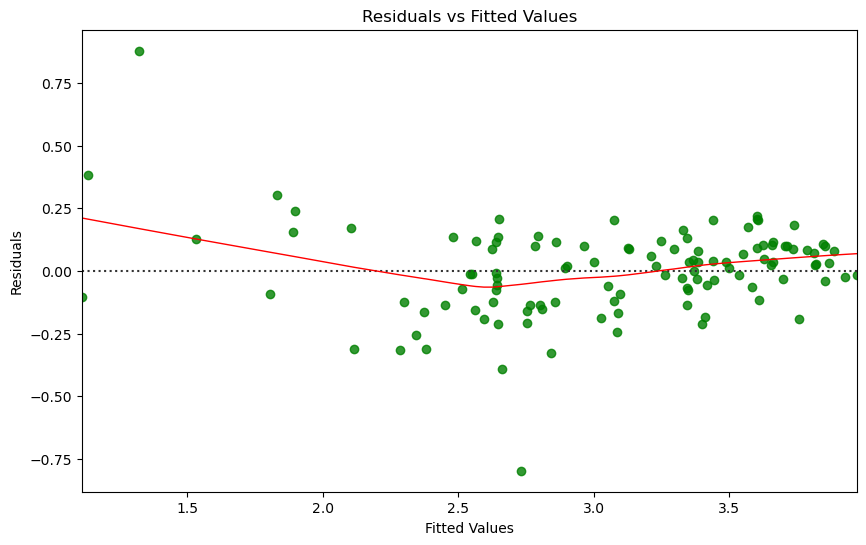

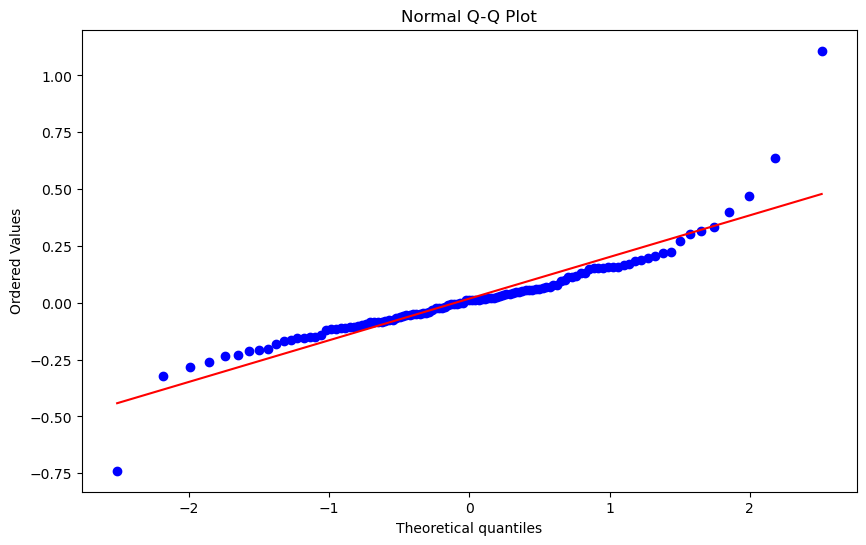

In [552]:
# Residual vs Fitted Plot
plt.figure(figsize=(10,6))
sns.residplot(x=y_pred, y=y_test, lowess=True, color='g', line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Normal Q-Q Plot
import scipy.stats as stats
plt.figure(figsize=(10,6))
stats.probplot(y_test - y_pred, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()


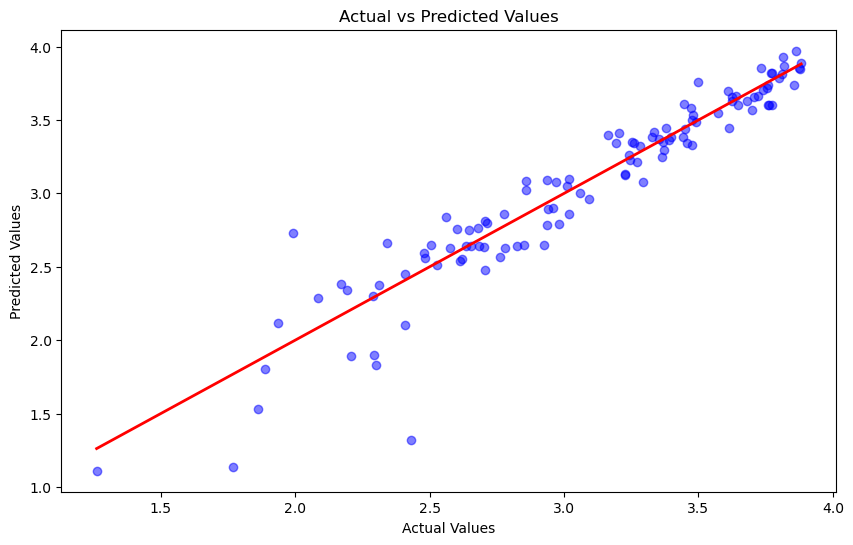

In [554]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Line for perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

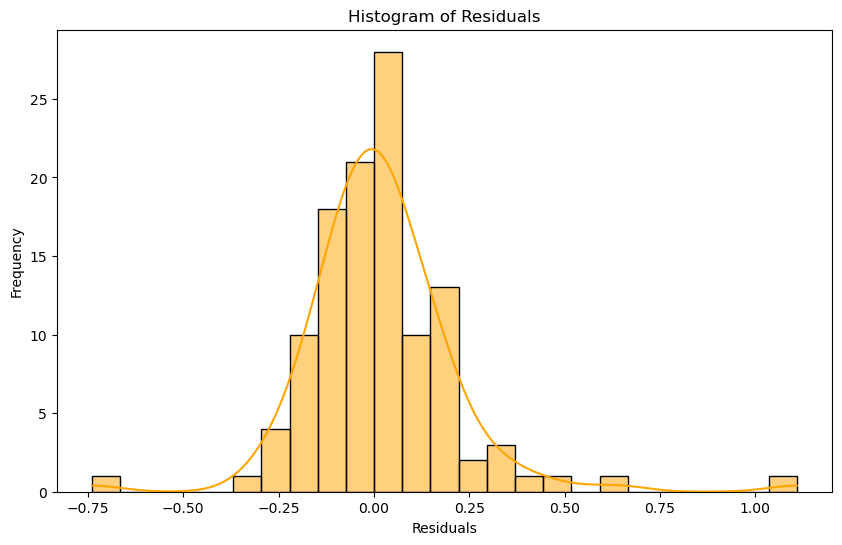

In [556]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, kde=True, color='orange')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

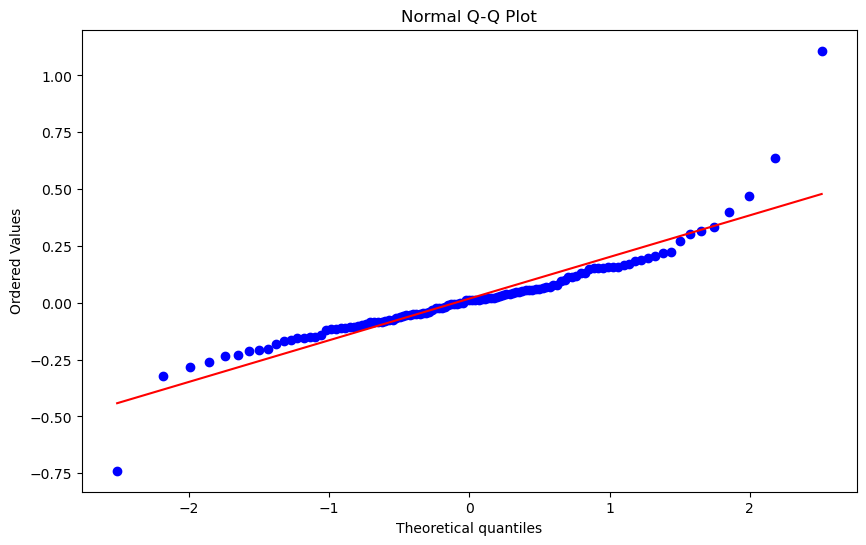

In [558]:
# Normal Q-Q Plot
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(y_test - y_pred, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()


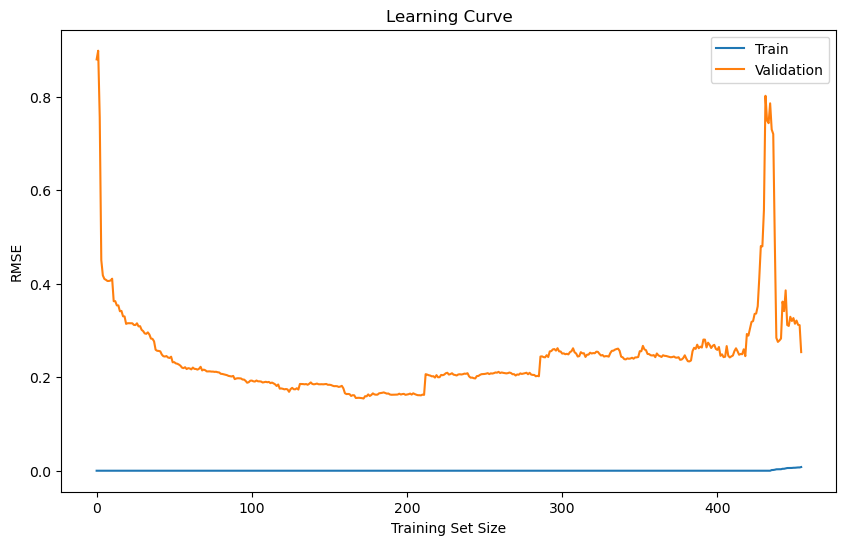

In [560]:
# Learning curve
train_errors, val_errors = [], []
for m in range(1, len(X_train)):
    am.fit(X_train[:m], y_train[:m])
    y_train_predict = am.predict(X_train[:m])
    y_val_predict = am.predict(X_test)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_test, y_val_predict))

plt.figure(figsize=(10, 6))
plt.plot(np.sqrt(train_errors), label='Train')
plt.plot(np.sqrt(val_errors), label='Validation')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('Learning Curve')
plt.legend()
plt.show()